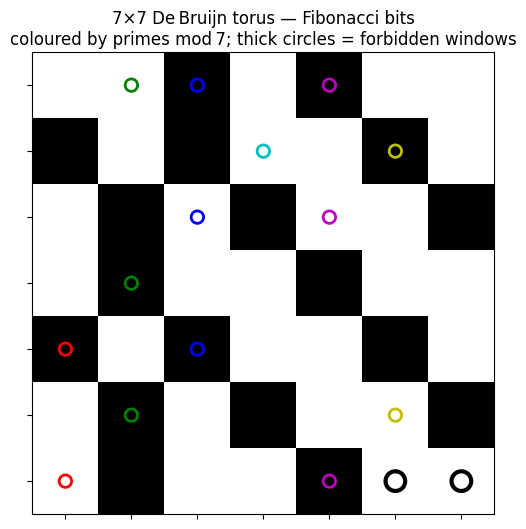

In [3]:
# --- 7×7 De Bruijn torus visual experiment ----------------------
import numpy as np, matplotlib.pyplot as plt, sympy as sp

# 1. Fibonacci word bits (first 49 bits)
def fib_word(n:int):
    a,b='0','01'
    while len(b)<n: a,b=b,a+b
    return np.frombuffer(b[:n].encode(),dtype=np.uint8)-48
bits = fib_word(49).reshape(7,7)

# 2. Prime colouring mod 7
primes = [p for p in range(2,50) if sp.isprime(p) and p%7 != 0]
colour_map = {1:'r',2:'g',3:'b',4:'c',5:'m',6:'y'}
prime_coords = [( (p-1)//7, (p-1)%7, colour_map[p%7] ) for p in primes]

# 3. Mark forbidden windows: '000' or '11*'
forbidden_start = []
seq = ''.join('1' if b else '0' for b in bits.flatten())
for i in range(49):
    w = seq[i:i+3] if i<=46 else seq[i:]+seq[:(i+3)%49]
    if w=='000' or w.startswith('11'): forbidden_start.append(((i)//7,(i)%7))

# 4. Plot
fig,ax = plt.subplots(figsize=(6,6))
ax.imshow(bits, cmap='Greys', interpolation='none')

# overlay primes
for r,c,col in prime_coords:
    ax.scatter(c,r, s=80, facecolors='none', edgecolors=col, linewidths=2)

# overlay forbidden windows
for r,c in forbidden_start:
    ax.scatter(c,r, s=200, facecolors='none', edgecolors='k', linewidths=3)

ax.set_xticks(range(7)); ax.set_yticks(range(7))
ax.set_xticklabels([]); ax.set_yticklabels([])
ax.set_title("7×7 De Bruijn torus — Fibonacci bits\ncoloured by primes mod 7; thick circles = forbidden windows")
plt.show()

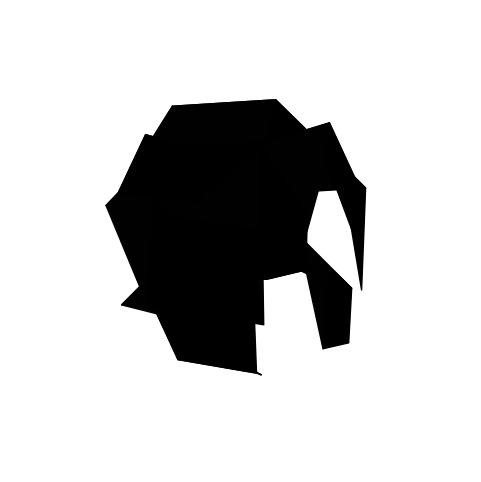

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt, numpy as np
bits = fib_word(49).reshape(7,7)           # reuse previous variable

R, r = 3, 1                                # major & minor radius
theta = np.linspace(0, 2*np.pi, 7, endpoint=False)
phi   = np.linspace(0, 2*np.pi, 7, endpoint=False)
TH, PH = np.meshgrid(theta, phi, indexing='ij')

X = (R + r*np.cos(PH)) * np.cos(TH)
Y = (R + r*np.cos(PH)) * np.sin(TH)
Z = r * np.sin(PH) + bits*0.6              # lift ones by 0.6

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, facecolors=plt.cm.gray(bits), shade=False)
ax.set_axis_off(); plt.show()
